In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

sns.set(style="darkgrid")
np.random.seed(200)

In [2]:
# Load the dataset
data = pd.read_csv("creditcard.csv")

In [3]:
data.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


In [4]:
data["Time"] = data["Time"].apply(lambda x : x / 3600 % 24)
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Count the occurrences of each class in the 'Class' column of the DataFrame
class_counts = data['Class'].value_counts().to_frame().reset_index()

In [7]:
# Rename the columns of the DataFrame
class_counts = class_counts.rename(columns={"index": "Target", "Class": "Count"})

In [8]:
# Display the DataFrame
print(class_counts)

   Count   count
0      0  284315
1      1     492


In [11]:
# Selecting a random sample of 1000 non-fraudulent transactions
non_fraud = data[data['Class'] == 0].sample(3000)

# Selecting all fraudulent transactions
fraud = data[data['Class'] == 1]

In [12]:
# Concatenate non_fraud and fraud DataFrames, shuffle the combined DataFrame, and reset the index
df = pd.concat([non_fraud, fraud]).sample(frac=1).reset_index(drop=True)

In [13]:
df.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,12.995556,-1.212682,-2.484824,-6.397186,3.670562,-0.863375,-1.855855,1.017732,-0.544704,-1.703378,...,1.396872,0.092073,-1.492882,-0.204227,0.532511,-0.293871,0.212663,0.431095,1335.0,1


In [15]:
# Separating features (X) and target variable (Y)
X = df.drop(['Class'], axis=1).values  # Features
Y = df["Class"].values  # Target variable

In [16]:
print(X[:1])
print(Y[:10])  # Print the first 5 rows

[[ 1.29955556e+01 -1.21268170e+00 -2.48482353e+00 -6.39718582e+00
   3.67056245e+00 -8.63375061e-01 -1.85585473e+00  1.01773158e+00
  -5.44703775e-01 -1.70337805e+00 -3.73965948e+00  1.73812401e+00
  -2.84444934e+00  7.65863961e-01 -4.79973713e+00 -1.13354116e-02
  -2.69316808e+00 -3.16695516e+00 -1.06780012e+00 -5.59132202e-01
   2.90837395e+00  1.39687206e+00  9.20728715e-02 -1.49288250e+00
  -2.04227396e-01  5.32510949e-01 -2.93871104e-01  2.12663060e-01
   4.31094708e-01  1.33500000e+03]]
[1 1 0 0 0 0 0 1 0 0]


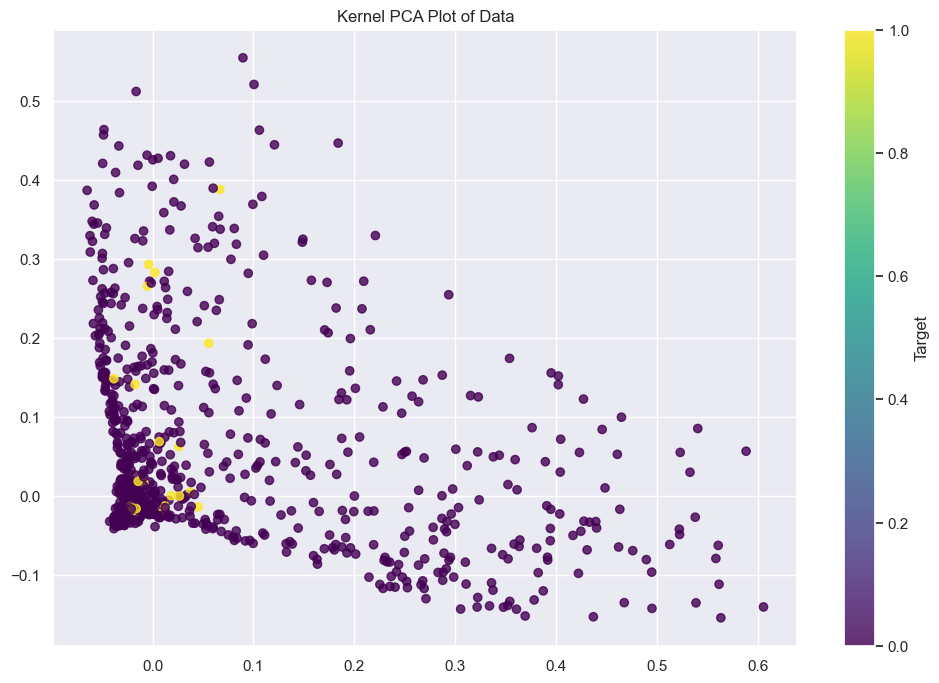

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA

# Assuming X and Y are the feature and target arrays, respectively
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
X_kpca = kpca.fit_transform(X)

plt.figure(figsize=(12, 8))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=Y, cmap='viridis', alpha=0.8)
plt.colorbar(label='Target')
plt.title('Kernel PCA Plot of Data')
plt.show()

C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

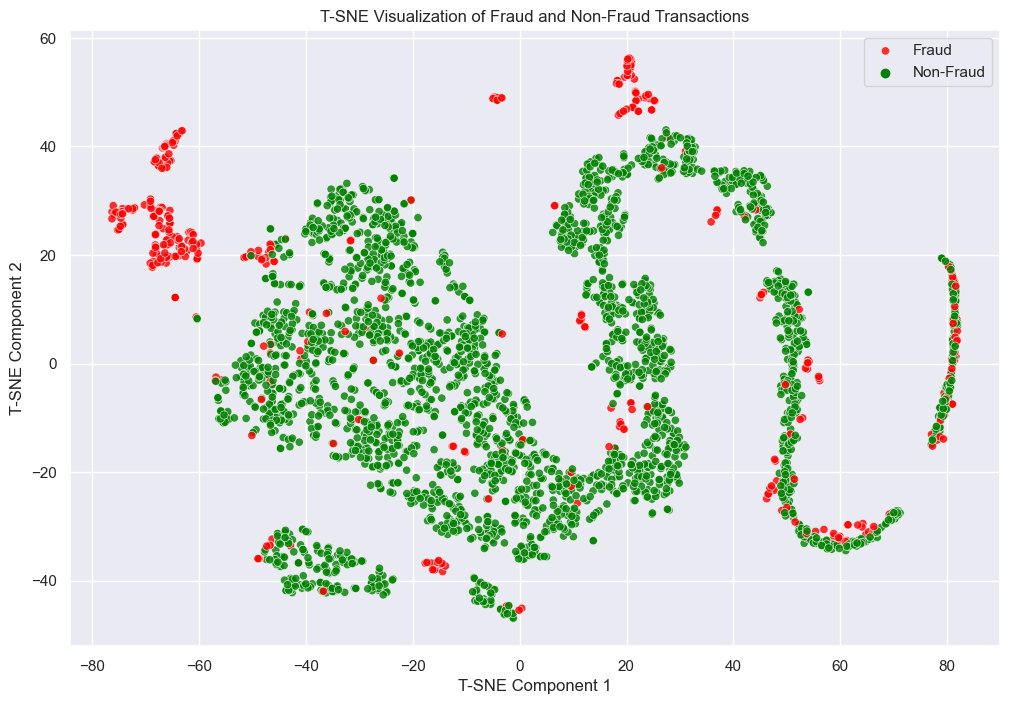

In [18]:
from sklearn.manifold import TSNE

# Perform T-SNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=Y, palette={0: 'green', 1: 'red'}, alpha=0.8)
plt.title('T-SNE Visualization of Fraud and Non-Fraud Transactions')
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.legend(['Fraud', 'Non-Fraud'])
plt.show()

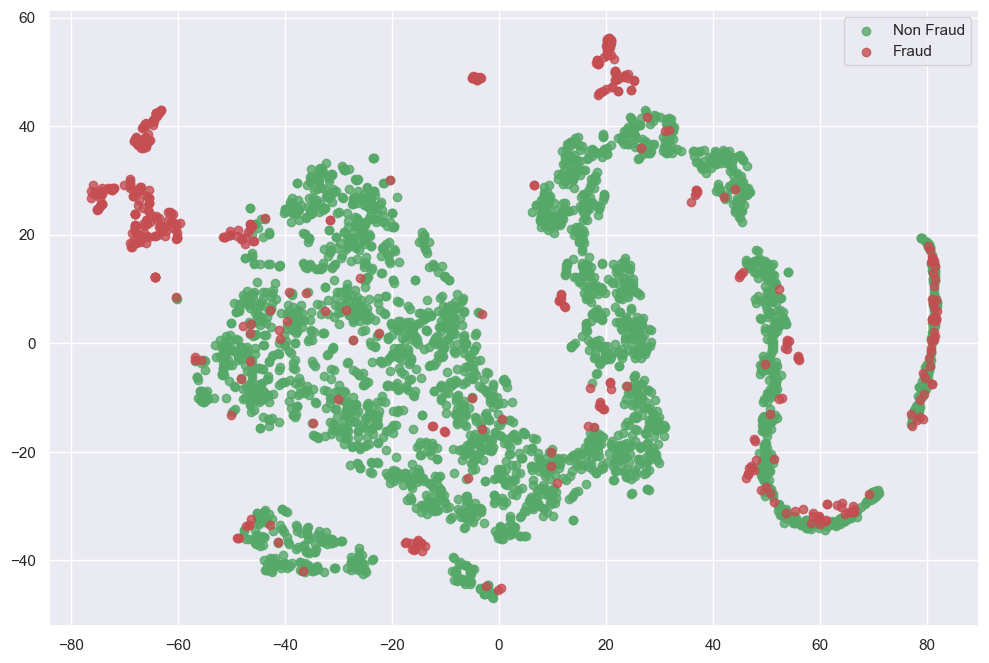

In [19]:
def tsne_plot(x1, y1):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth=1, alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth=1, alpha=0.8, label='Fraud')

    plt.legend(loc='best')
    plt.show()

tsne_plot(X, Y)

In [20]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

## input layer 
input_layer = Input(shape=(X.shape[1],))

## encoding part
encoded = Dense(512, activation='relu')(input_layer)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)

## decoding part
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)

## output layer
output_layer = Dense(X.shape[1], activation='relu')(decoded)

## Combine input and output layers to create autoencoder model
autoencoder = Model(input_layer, output_layer)

## Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

## Print the summary of the model
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │          15,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 30)                  │          15,390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 376,670 (1.44 MB)

 Trainable params: 376,670 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")
# autoencoder.compile(optimizer="rmsprop", loss="huber_loss")

In [23]:
x = data.drop(["Class"], axis=1)
y = data["Class"].values

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(X)

# Separate the scaled features into non-fraudulent and fraudulent transactions
x_norm = x_scale[Y == 0]
x_fraud = x_scale[Y == 1]

In [25]:
autoencoder.fit(x_norm[0:2000], x_norm[0:2000], 
                batch_size=1, 
                epochs=10, 
                shuffle=True, 
                validation_split=0.20)

Epoch 1/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.3761 - val_loss: 0.3310
Epoch 2/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.2994 - val_loss: 0.2199
Epoch 3/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.2139 - val_loss: 0.2010
Epoch 4/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.1949 - val_loss: 0.1836
Epoch 5/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.1828 - val_loss: 0.1821
Epoch 6/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.1820 - val_loss: 0.1820
Epoch 7/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.1817 - val_loss: 0.1820
Epoch 8/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.1819 - val_loss: 0.1820
Epoch 9/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.1822 - val_loss: 0.1820
Epoch 10/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.1815 - val_loss: 0.1820


In [26]:
from keras.models import Sequential

hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])
hidden_representation.add(autoencoder.layers[3])

# Print the summary of hidden_representation model
hidden_representation.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │          15,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 180,096 (703.50 KB)

 Trainable params: 180,096 (703.50 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Transform normalized non-fraudulent transactions
norm_hid_rep = hidden_representation.predict(x_norm[:3000])

# Transform normalized fraudulent transactions
fraud_hid_rep = hidden_representation.predict(x_fraud)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

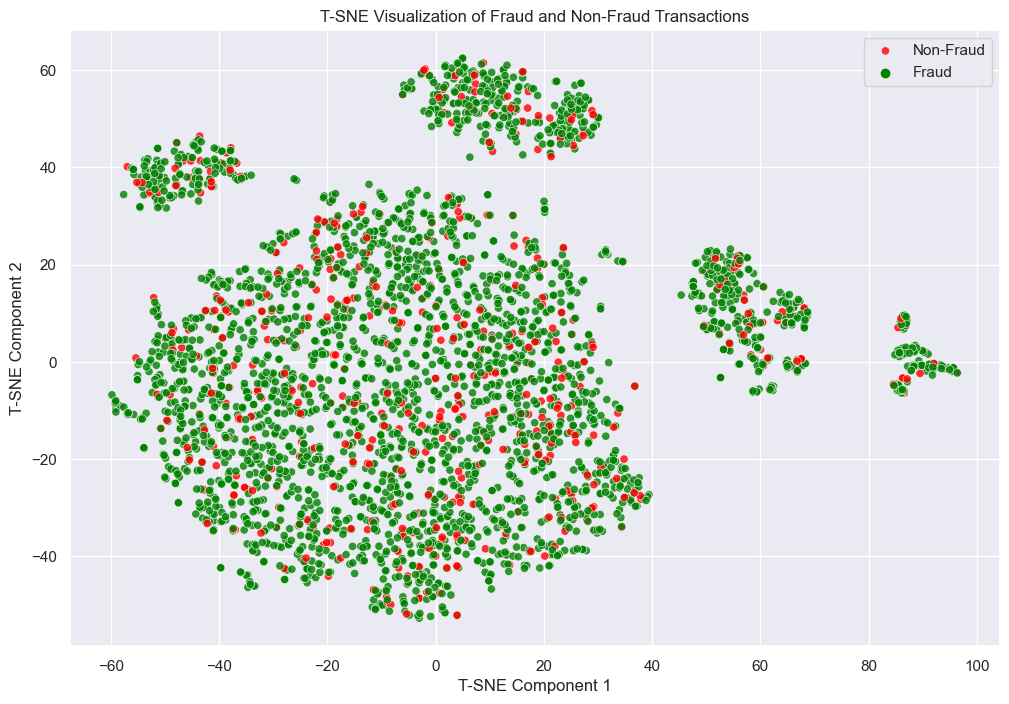

In [28]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=0)

# Fit and transform the data
X_tsne = tsne.fit_transform(rep_x)

# Visualize the data
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1],hue=Y, palette={0: 'green', 1: 'red'}, alpha=0.8)
plt.title('T-SNE Visualization of Fraud and Non-Fraud Transactions')
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.legend(['Non-Fraud', 'Fraud'])
plt.show()

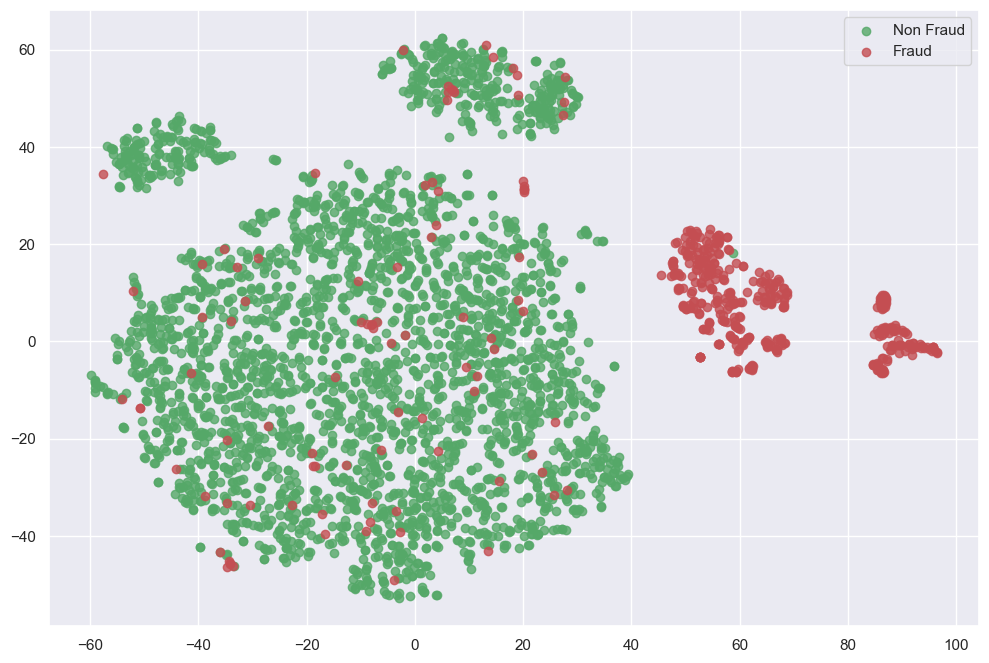

In [29]:
tsne_plot(rep_x, rep_y)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)
clf = LogisticRegression(solver="lbfgs").fit(train_x, train_y)
pred_y = clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_y) * 100)


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       726
         1.0       1.00      0.70      0.82       147

    accuracy                           0.95       873
   macro avg       0.97      0.85      0.90       873
weighted avg       0.95      0.95      0.95       873


Accuracy Score:  94.95990836197021


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Splitting the data into train and test sets
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)

# Initialize the Logistic Regression model
clf = LogisticRegression(solver="lbfgs")

# Load the trained weights (parameters) into the model
clf.coef_ = autoencoder.layers[4].get_weights()[0]
clf.intercept_ = autoencoder.layers[4].get_weights()[1]

# Train the model on the training data
clf.fit(train_x, train_y)

# Predictions on the validation set
pred_y = clf.predict(val_x)

# Displaying actual target and predicted values for each label
for label in [0, 1]:
    print(f"Label: {label}")
    
    # Selecting data points with the current label from the validation set
    indices = [i for i, v in enumerate(val_y) if v == label]
    selected_val_x = val_x[indices[:5]]  # Selecting first 5 data points for each label
    actual_labels = val_y[indices[:5]]   # Actual labels for the selected data points
    
    # Predicting labels for the selected data points
    predicted_labels = clf.predict(selected_val_x)
    
    # Displaying actual and predicted labels
    for i in range(len(actual_labels)):
        print(f"Actual: {actual_labels[i]}, Predicted: {predicted_labels[i]}")
    
    print()

Label: 0
Actual: 0.0, Predicted: 0.0
Actual: 0.0, Predicted: 0.0
Actual: 0.0, Predicted: 0.0
Actual: 0.0, Predicted: 0.0
Actual: 0.0, Predicted: 0.0

Label: 1
Actual: 1.0, Predicted: 1.0
Actual: 1.0, Predicted: 1.0
Actual: 1.0, Predicted: 1.0
Actual: 1.0, Predicted: 1.0
Actual: 1.0, Predicted: 0.0



In [34]:
# Splitting the data into train and test sets
x_train, x_test, _, _ = train_test_split(X, Y, test_size=0.2, random_state=42)

In [42]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import optimizers

# Define the autoencoder model architecture
def build_autoencoder(optimizer, loss):
    # input layer
    input_layer = Input(shape=(X.shape[1],))
    
    # encoding part
    encoded = Dense(512, activation='relu')(input_layer)
    encoded = Dense(256, activation='relu')(encoded)
    encoded = Dense(128, activation='relu')(encoded)
    encoded = Dense(64, activation='relu')(encoded)
    
    # decoding part
    decoded = Dense(128, activation='relu')(encoded)
    decoded = Dense(256, activation='relu')(decoded)
    decoded = Dense(512, activation='relu')(decoded)
    
    # output layer
    output_layer = Dense(X.shape[1], activation='relu')(decoded)
    
    # combine input and output layers to create autoencoder model
    autoencoder = Model(input_layer, output_layer)
    
    # compile the model with specified optimizer and loss
    autoencoder.compile(optimizer=optimizer, loss=loss)
    
    return autoencoder

# List of optimizers and loss functions to try
optimizers_list = ['adam','adadelta', 'rmsprop', 'sgd']
loss_functions = ['mse', 'mae']

# Train autoencoder for each combination
for optimizer in optimizers_list:
    for loss in loss_functions:
        print(f"Training Autoencoder with Optimizer: {optimizer}, Loss: {loss}")
        autoencoder = build_autoencoder(optimizer=optimizer, loss=loss)
        autoencoder.fit(x_norm[0:2000], x_norm[0:2000], 
                        batch_size=1, 
                        epochs=5, 
                        shuffle=True, 
                        validation_split=0.20)
        print("Training complete.")

        # Evaluate the model
        evaluation = autoencoder.evaluate(x_test, x_test)
        print(f"Evaluation (MSE) for Optimizer: {optimizer}, Loss: {loss}: {evaluation}")

Training Autoencoder with Optimizer: adadelta, Loss: mse
Epoch 1/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.3681 - val_loss: 0.2757
Epoch 2/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2027 - val_loss: 0.0979
Epoch 3/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0950 - val_loss: 0.0941
Epoch 4/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0931 - val_loss: 0.0940
Epoch 5/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0931 - val_loss: 0.0940
Training complete.
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2608.3037  
Evaluation (MSE) for Optimizer: adadelta, Loss: mse: 3032.60400390625
Training Autoencoder with Optimizer: adadelta, Loss: mae
Epoch 1/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.5524 - val_loss: 0.4112
Epoch 2/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.3241 - val_loss: 0.2637
Epoch 3/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2643 - val_loss: 0.2635
Epoch 4/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 7